In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data = pd.read_csv(url)
data.columns = ['Classe', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#data = data[:-48] #remove terceira classe
data.head()

,Classe,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


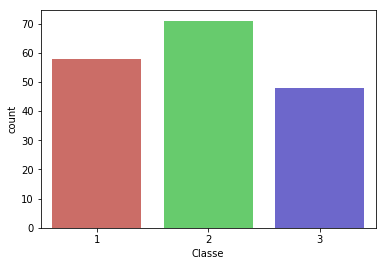

In [7]:
sb.countplot(x='Classe',data=data, palette='hls')

In [8]:
X = data.ix[:,(1,2,3,4,5,6,7,8,9,10,11,12,13)].values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [9]:
y = data.ix[:,0].values
y[-5:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([3, 3, 3, 3, 3])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .9, random_state=24)

LogReg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
y_pred

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 1, 1, 3,
       2, 3, 3, 1, 2, 2, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 1, 3, 1, 1, 2, 3,
       3, 3, 3, 2, 2, 3, 2, 1, 3, 2, 3, 2, 1, 3, 1, 3, 2, 3, 2, 2, 3, 2,
       3, 2, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 1, 3, 1, 3, 2,
       1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 2, 1, 1, 2, 3, 2, 3, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3,
       2, 3, 2, 1, 1, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 3, 3,
       1, 2, 2, 2, 3, 2])

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29 22  5]
 [ 0 35 29]
 [ 0  7 33]]


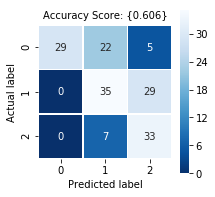

In [12]:
import seaborn as sns

plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = LogReg.score(X_test, y_test)
all_sample_title = 'Accuracy Score: {%0.3f}' % score
plt.title(all_sample_title, size = 10);

plt.show();

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.52      0.68        56
           2       0.55      0.55      0.55        64
           3       0.49      0.82      0.62        40

    accuracy                           0.61       160
   macro avg       0.68      0.63      0.62       160
weighted avg       0.69      0.61      0.61       160

